In [2]:
# ================================
# 1. Imports
# ================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
import os
sys.path.append(os.path.abspath(".."))
from src.preprocessing import preprocess_data, scale_split
from src.modeling import train_and_evaluate
from src.modeling import train_gradient_boosting
from src.modeling import get_feature_importance
from src.predict import predict_car_price
import ipywidgets as widgets
from IPython.display import display


In [3]:
# ================================
# 2. Load Dataset
# ================================
df = pd.read_csv("../data/car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


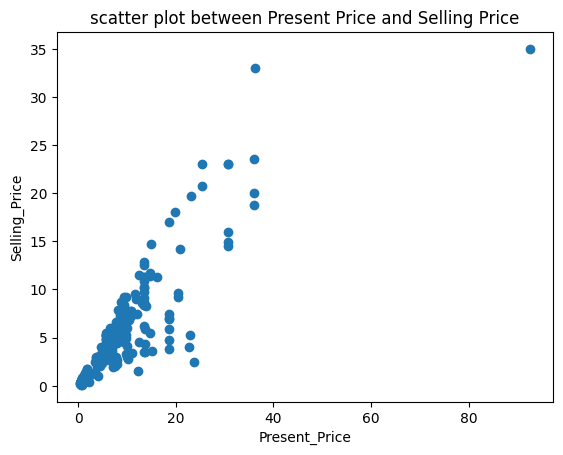

In [6]:

# Create the scatter plot between Present Price vs Selling Price
plt.scatter(x=df["Present_Price"], y=df["Selling_Price"])
plt.xlabel("Present_Price")
plt.ylabel("Selling_Price")
plt.title("scatter plot between Present Price and Selling Price")
plt.show()

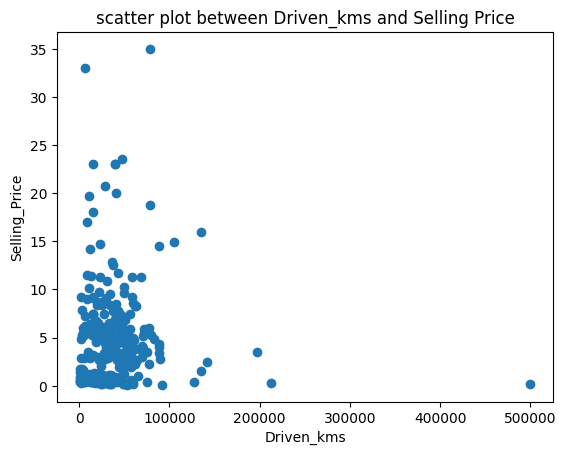

In [7]:
# Create the scatter plot between Driven Kms vs Selling Price
plt.scatter(x=df["Driven_kms"], y=df["Selling_Price"])
plt.xlabel("Driven_kms")
plt.ylabel("Selling_Price")
plt.title("scatter plot between Driven_kms and Selling Price")
plt.show()

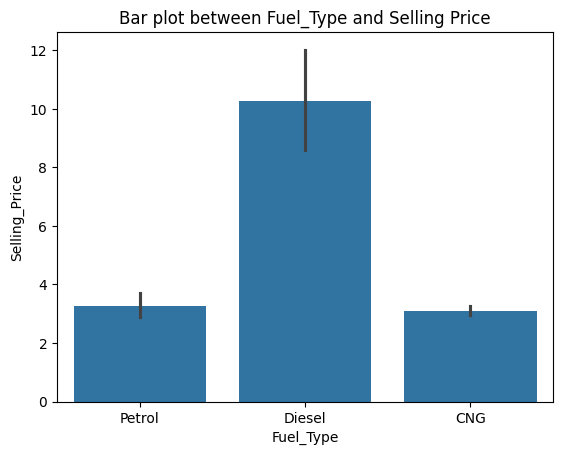

In [8]:
sns.barplot(x="Fuel_Type", y="Selling_Price", data=df)
plt.xlabel("Fuel_Type")
plt.ylabel("Selling_Price")
plt.title("Bar plot between Fuel_Type and Selling Price")
plt.show()

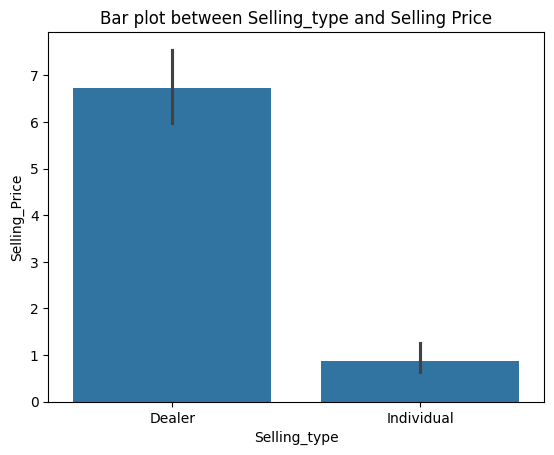

In [9]:
sns.barplot(x="Selling_type", y="Selling_Price", data=df)
plt.xlabel("Selling_type")
plt.ylabel("Selling_Price")
plt.title("Bar plot between Selling_type and Selling Price")
plt.show()

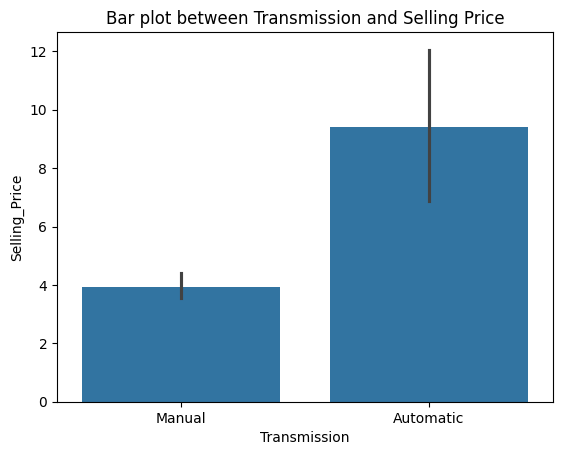

In [10]:
sns.barplot(x="Transmission", y="Selling_Price", data=df)
plt.xlabel("Transmission")
plt.ylabel("Selling_Price")
plt.title("Bar plot between Transmission and Selling Price")
plt.show()

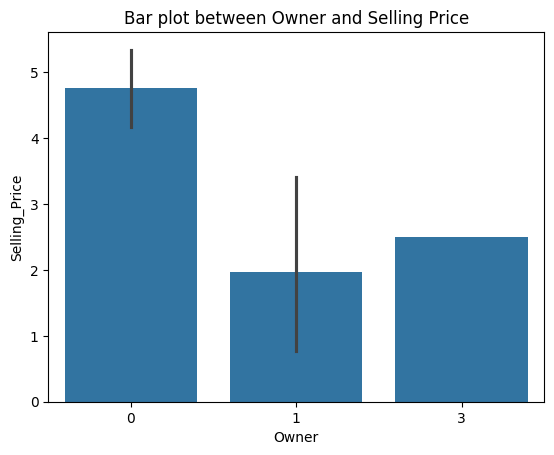

In [11]:
sns.barplot(x="Owner", y="Selling_Price", data=df)
plt.xlabel("Owner")
plt.ylabel("Selling_Price")
plt.title("Bar plot between Owner and Selling Price")
plt.show()

In [5]:
# ================================
# 3. Preprocess Data
# ================================
df_encoded = preprocess_data(df)
df_encoded.head()

,Selling_Price,Present_Price,Driven_kms,Age,brand_encoded,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Owner_1,Transmission_Manual
0,3.35,5.59,27000,11,2.862500,False,True,False,False,True
1,4.75,9.54,43000,12,3.158333,True,False,False,False,True
2,7.25,9.85,6900,8,7.472222,False,True,False,False,True
3,2.85,4.15,5200,14,2.512500,False,True,False,False,True
4,4.60,6.87,42450,11,4.540000,True,False,False,False,True


In [8]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 282 entries, 0 to 300
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Selling_Price            282 non-null    float64
 1   Present_Price            282 non-null    float64
 2   Driven_kms               282 non-null    int64  
 3   Age                      282 non-null    int64  
 4   brand_encoded            282 non-null    float64
 5   Fuel_Type_Diesel         282 non-null    bool   
 6   Fuel_Type_Petrol         282 non-null    bool   
 7   Selling_type_Individual  282 non-null    bool   
 8   Owner_1                  282 non-null    bool   
 9   Transmission_Manual      282 non-null    bool   
dtypes: bool(5), float64(3), int64(2)
memory usage: 14.6 KB


In [6]:
# ================================
# 4. Train-Test Split & Scaling
# ================================
X_train_scaled, X_test_scaled, y_train, y_test, scaler, feature_names, X_train, X_test = scale_split(df_encoded)

In [7]:
# Convert scaled arrays back into DataFrame with original column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_train_scaled_df.head()

,Present_Price,Driven_kms,Age,brand_encoded,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Owner_1,Transmission_Manual
0,-1.106493,-0.805825,-1.169631,-1.150843,-0.457905,0.472045,1.295597,-0.204124,0.303699
1,1.431008,-0.437154,-0.802592,2.650379,-0.457905,0.472045,-0.771845,-0.204124,0.303699
2,0.340736,0.464989,1.399642,-0.246987,-0.457905,0.472045,-0.771845,-0.204124,0.303699
3,-1.003673,-0.084919,1.032603,-1.156291,-0.457905,0.472045,1.295597,-0.204124,0.303699
4,-1.044413,-0.421342,-0.435553,-1.110609,-0.457905,0.472045,1.295597,-0.204124,0.303699


In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Baseline prediction: predict the mean of y_train for all test samples
y_baseline_pred = np.full(shape=y_test.shape, fill_value=y_train.mean())

# Evaluate baseline performance
mae = mean_absolute_error(y_test, y_baseline_pred)
mse = mean_squared_error(y_test, y_baseline_pred)
r2 = r2_score(y_test, y_baseline_pred)

print("Baseline Model (Predict Mean)",y_train.mean())
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Baseline Model (Predict Mean) 3.9324888888888885
Mean Absolute Error (MAE): 2.4297801169590643
Mean Squared Error (MSE): 9.40093719651722
R² Score: -1.2917796216482813e-05


In [9]:
# ================================
# 5. Train & Evaluate Models
# ================================
results, best_model_name, best_model = train_and_evaluate(X_train_scaled, X_test_scaled, y_train, y_test)

print("Model Comparison:")
for name, metrics in results.items():
    print(f"\n{name}:")
    print(f"  MAE: {metrics['MAE']:.3f}")
    print(f"  MSE: {metrics['MSE']:.3f}")
    print(f"  R²: {metrics['R²']:.3f}")

print(f"\n✅ Best Model: {best_model_name} (R² = {results[best_model_name]['R²']:.3f})")


Model Comparison:

Linear Regression:
  MAE: 0.846
  MSE: 1.210
  R²: 0.871

Decision Tree:
  MAE: 0.593
  MSE: 1.130
  R²: 0.880

Random Forest:
  MAE: 0.396
  MSE: 0.422
  R²: 0.955

Gradient Boosting:
  MAE: 0.378
  MSE: 0.317
  R²: 0.966

Support Vector Regressor:
  MAE: 0.548
  MSE: 1.169
  R²: 0.876

✅ Best Model: Gradient Boosting (R² = 0.966)


In [10]:
# Train the actual model

gb_model, gb_metrics, y_pred = train_gradient_boosting(X_train_scaled, X_test_scaled, y_train, y_test)

print("Gradient Boosting Regressor Performance:")
print(f"MAE: {gb_metrics['MAE']:.3f}")
print(f"MSE: {gb_metrics['MSE']:.3f}")
print(f"R²: {gb_metrics['R²']:.3f}")


Gradient Boosting Regressor Performance:
MAE: 0.378
MSE: 0.317
R²: 0.966


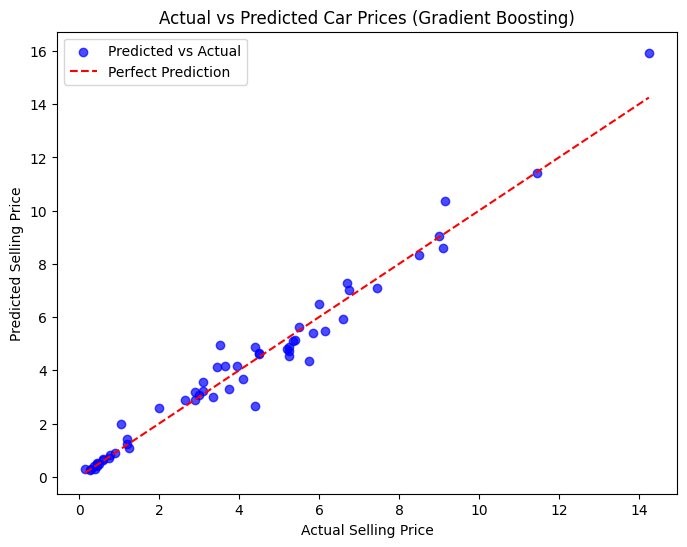

In [11]:
# Scatter plot of Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue", label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color="red", linestyle="--", label="Perfect Prediction")

plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Car Prices (Gradient Boosting)")
plt.legend()
plt.show()

In [12]:

importance_df = get_feature_importance(gb_model, feature_names)

if importance_df is not None:
     print(importance_df)
else:
    print("This model does not provide feature importances.")


                   Feature  Importance
3            brand_encoded    0.479967
0            Present_Price    0.367626
2                      Age    0.133145
1               Driven_kms    0.012239
5         Fuel_Type_Petrol    0.003776
4         Fuel_Type_Diesel    0.003151
8      Transmission_Manual    0.000084
6  Selling_type_Individual    0.000011
7                  Owner_1    0.000002


In [15]:

target_encoding = df.groupby('brand')['Selling_Price'].mean().to_dict()

# Widgets for inputs
present_price = widgets.FloatText(description="Present Price (Lakh):")
driven_kms = widgets.IntText(description="Driven Kms:")
age = widgets.IntText(description="Car Age (years):")

brand = widgets.Dropdown(
    options=list(target_encoding.keys()),
    description="Brand:"
)

fuel_type_diesel = widgets.Checkbox(value=False, description="Diesel")
fuel_type_petrol = widgets.Checkbox(value=False, description="Petrol")
selling_type_individual = widgets.Checkbox(value=False, description="Individual Seller")
owner_1 = widgets.Checkbox(value=False, description="First Owner")
transmission_manual = widgets.Checkbox(value=False, description="Manual Transmission")

button = widgets.Button(description="Predict Price")

# Display all widgets
display(present_price, driven_kms, age, brand,
        fuel_type_diesel, fuel_type_petrol, 
        selling_type_individual, owner_1, transmission_manual, button)

def on_button_clicked(b):
    sample_input = {
        "Present_Price": present_price.value,
        "Driven_kms": driven_kms.value,
        "Age": age.value,
        "brand_encoded": target_encoding.get(brand.value, np.mean(list(target_encoding.values()))),
        "Fuel_Type_Diesel": int(fuel_type_diesel.value),
        "Fuel_Type_Petrol": int(fuel_type_petrol.value),
        "Selling_type_Individual": int(selling_type_individual.value),
        "Owner_1": int(owner_1.value),
        "Transmission_Manual": int(transmission_manual.value)
    }

    predicted_price = predict_car_price(gb_model, scaler, sample_input, feature_names)
    print(f"\n✅ Predicted Selling Price: {predicted_price:.2f} lakhs")

button.on_click(on_button_clicked)


FloatText(value=0.0, description='Present Price (Lakh):')

IntText(value=0, description='Driven Kms:')

IntText(value=0, description='Car Age (years):')

Dropdown(description='Brand:', options=('800', 'Activa', 'Bajaj', 'Hero', 'Honda', 'Hyosung', 'KTM', 'Mahindra…

Checkbox(value=False, description='Diesel')

Checkbox(value=False, description='Petrol')

Checkbox(value=False, description='Individual Seller')

Checkbox(value=False, description='First Owner')

Checkbox(value=False, description='Manual Transmission')

Button(description='Predict Price', style=ButtonStyle())


✅ Predicted Selling Price: 10.57 lakhs

✅ Predicted Selling Price: 10.76 lakhs

✅ Predicted Selling Price: 10.14 lakhs

✅ Predicted Selling Price: 9.99 lakhs
